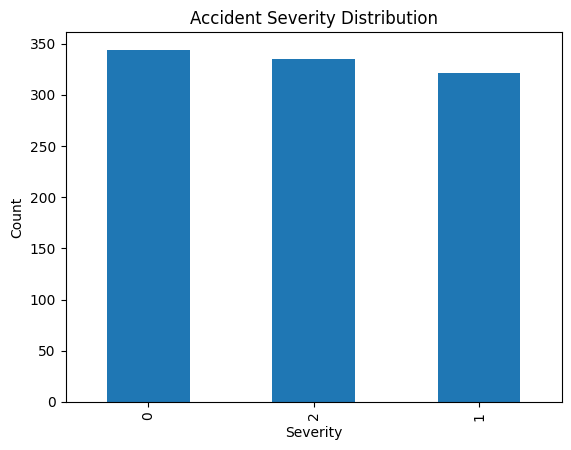

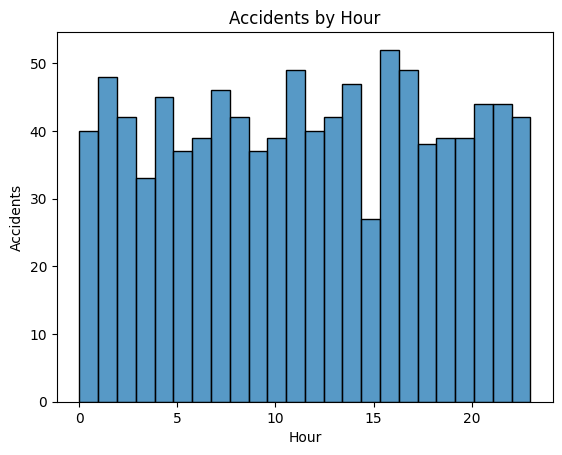

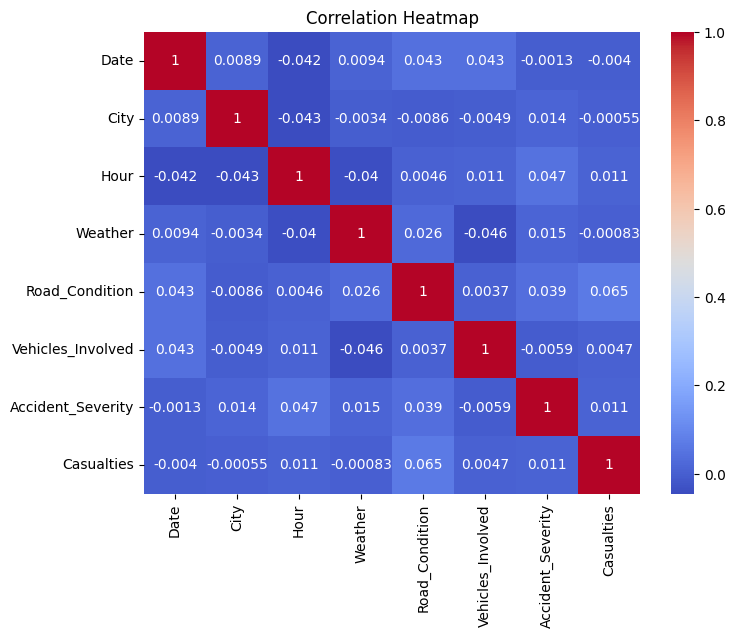

MAE: 2.4821736262758964
MSE: 8.392193635754277
R2 Score: -0.006406053137814061


,Date,City,Hour,Weather,Road_Condition,Vehicles_Involved,Accident_Severity,Casualties
0,2023-01-01,3,11,0,2,5,2,5
1,2023-01-02,4,11,0,2,4,1,1
2,2023-01-03,2,3,0,0,1,1,3
3,2023-01-04,4,15,0,2,5,1,1
4,2023-01-05,4,3,0,2,2,2,9
...,...,...,...,...,...,...,...,...
995,2025-09-22,1,17,1,0,4,2,9
996,2025-09-23,0,5,2,1,4,0,9
997,2025-09-24,0,8,1,0,5,1,8
998,2025-09-25,3,0,0,2,5,2,3


In [1]:
# ----------------------------------------
# Traffic Accident Data Analysis & ML
# ----------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ----------------------------------------
# Create Dataset (1000 Records)
# ----------------------------------------

np.random.seed(42)

data = {
    "Date": pd.date_range(start="2023-01-01", periods=1000),
    "City": np.random.choice(
        ["Chennai", "Coimbatore", "Madurai", "Salem", "Trichy"], 1000
    ),
    "Hour": np.random.randint(0, 24, 1000),
    "Weather": np.random.choice(
        ["Clear", "Rainy", "Foggy"], 1000
    ),
    "Road_Condition": np.random.choice(
        ["Dry", "Wet", "Damaged"], 1000
    ),
    "Vehicles_Involved": np.random.randint(1, 6, 1000),
    "Accident_Severity": np.random.choice(
        ["Low", "Medium", "High"], 1000
    ),
    "Casualties": np.random.randint(0, 10, 1000)
}

df = pd.DataFrame(data)

# ----------------------------------------
# Data Cleaning
# ----------------------------------------

df.drop_duplicates(inplace=True)

# ----------------------------------------
# Encode Categorical Data
# ----------------------------------------

le = LabelEncoder()

df["City"] = le.fit_transform(df["City"])
df["Weather"] = le.fit_transform(df["Weather"])
df["Road_Condition"] = le.fit_transform(df["Road_Condition"])
df["Accident_Severity"] = le.fit_transform(df["Accident_Severity"])

# ----------------------------------------
# Visualization
# ----------------------------------------

plt.figure()
df["Accident_Severity"].value_counts().plot(kind="bar")
plt.title("Accident Severity Distribution")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.show()

plt.figure()
sns.histplot(df["Hour"], bins=24)
plt.title("Accidents by Hour")
plt.xlabel("Hour")
plt.ylabel("Accidents")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# ----------------------------------------
# Machine Learning
# ----------------------------------------

X = df[
    ["City", "Hour", "Weather", "Road_Condition",
     "Vehicles_Involved", "Accident_Severity"]
]
y = df["Casualties"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# ----------------------------------------
# Evaluation
# ----------------------------------------

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# ----------------------------------------
# Display Dataset
# ----------------------------------------

df
